In [1443]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.ensemble import *
import textwrap
import joblib
import seaborn as sns
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [1444]:
path='privacy_data.csv'

In [1445]:
data=pd.read_csv(path)

In [1446]:
data.head(5)

,Q1,Q2,Q3,Q4,Q5,Q1.1,Q2.1,Q3.1,Q4.1,Q5.1,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13
0,1. What's your age?,What's your Gender,What's your educational level?,What's your occupation?,Frequency of Online Platform Usage,I am concerned about how much personal informa...,I trust that my privacy is adequately protecte...,The security of my personal data on online pla...,I understand how online platforms use Big Data...,I trust that online service providers handle m...,I am comfortable with how my data is used in B...,I believe online service providers are clear a...,I am aware of ethical issues involved in Big D...,I feel well informed about my rights regarding...,I know how to report concerns about unethical ...,I believe the benefits of Big Data Analytics j...,Online platforms should limit their use of Big...,Public discussions and education about Big Dat...
1,25-34,Male,Master's Degree,Employed Part-Time,Daily,A little,Extremely inadequate,Strongly disagree,Strongly disagree,Somewhat disagree,Extremely uncomfortable,Strongly disagree,Strongly disagree,NaN,NaN,Strongly disagree,Strongly agree,Strongly disagree
2,35-44,Female,Master's Degree,Employed Full-Time,Daily,A great deal,Neither adequate nor inadequate,Strongly agree,Strongly agree,Strongly agree,Extremely comfortable,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
3,55-64,Non-binary / third gender,No formal education,Homemaker,Never,None at all,Extremely inadequate,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Somewhat comfortable,Somewhat agree,Somewhat disagree,Strongly agree,Neither agree nor disagree,Somewhat disagree,Strongly agree,Neither agree nor disagree
4,35-44,Male,Master's Degree,Student,Daily,None at all,Extremely inadequate,Strongly disagree,Strongly disagree,Strongly disagree,Neither comfortable nor uncomfortable,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree


In [1447]:
df=data

In [1448]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      404 non-null    object
 1   Q2      404 non-null    object
 2   Q3      404 non-null    object
 3   Q4      404 non-null    object
 4   Q5      403 non-null    object
 5   Q1.1    404 non-null    object
 6   Q2.1    404 non-null    object
 7   Q3.1    403 non-null    object
 8   Q4.1    404 non-null    object
 9   Q5.1    404 non-null    object
 10  Q6      404 non-null    object
 11  Q7      404 non-null    object
 12  Q8      404 non-null    object
 13  Q9      403 non-null    object
 14  Q10     403 non-null    object
 15  Q11     404 non-null    object
 16  Q12     404 non-null    object
 17  Q13     404 non-null    object
dtypes: object(18)
memory usage: 56.9+ KB


In [1449]:
data.isna().sum()

Q1      0
Q2      0
Q3      0
Q4      0
Q5      1
Q1.1    0
Q2.1    0
Q3.1    1
Q4.1    0
Q5.1    0
Q6      0
Q7      0
Q8      0
Q9      1
Q10     1
Q11     0
Q12     0
Q13     0
dtype: int64

In [1450]:
#drop nan values
data.dropna(inplace=True)
data.isna().sum()

Q1      0
Q2      0
Q3      0
Q4      0
Q5      0
Q1.1    0
Q2.1    0
Q3.1    0
Q4.1    0
Q5.1    0
Q6      0
Q7      0
Q8      0
Q9      0
Q10     0
Q11     0
Q12     0
Q13     0
dtype: int64

In [1451]:
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q1.1,Q2.1,Q3.1,Q4.1,Q5.1,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13
count,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401
unique,6,4,8,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6
top,25-34,Female,Bachelor's Degree,Employed Full-Time,Daily,A little,Somewhat adequate,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat comfortable,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Somewhat agree
freq,306,218,306,304,366,141,138,242,197,182,184,163,168,182,175,142,259,188


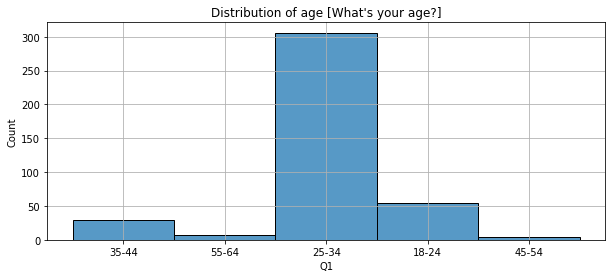

In [1452]:
plt.figure(figsize=(10, 4))
plt.title("Distribution of age [What's your age?]")
sns.histplot(data['Q1'][1:])
plt.grid('on')
plt.show()

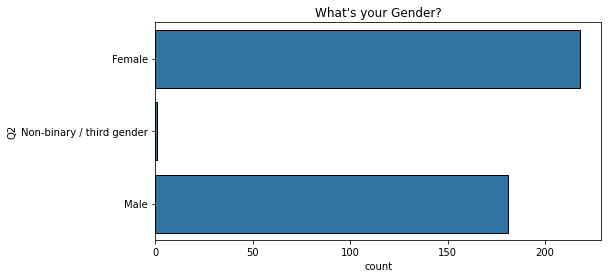

In [1453]:
plt.figure(figsize=(8, 4))
plt.title("What's your Gender?")
sns.countplot(data['Q2'][1:], edgecolor='black')
plt.show()

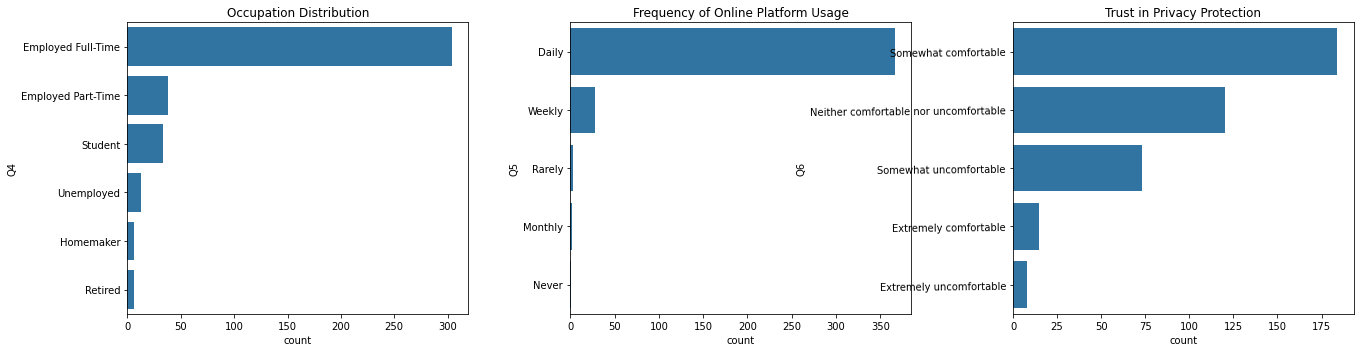

In [1454]:
plt.figure(figsize=(19, 5))

# Plotting Occupation
plt.subplot(1, 3, 1)
sns.countplot(y='Q4', data=df.iloc[1:,:] , order=df['Q4'][1:].value_counts().index)
plt.title('Occupation Distribution')

# Plotting Frequency of Online Platform Usage
plt.subplot(1, 3, 2)
sns.countplot(y='Q5', data=df.iloc[1:,:] , order=df['Q5'][1:].value_counts().index)
plt.title('Frequency of Online Platform Usage')

# Plotting Trust in Privacy Protection
plt.subplot(1, 3, 3)
sns.countplot(y='Q6', data=df.iloc[1:,:] , order=df['Q6'][1:].value_counts().index)
plt.yticks(rotation=.49)
plt.title('Trust in Privacy Protection')

plt.tight_layout()
plt.subplots_adjust(wspace=.3)
plt.show()

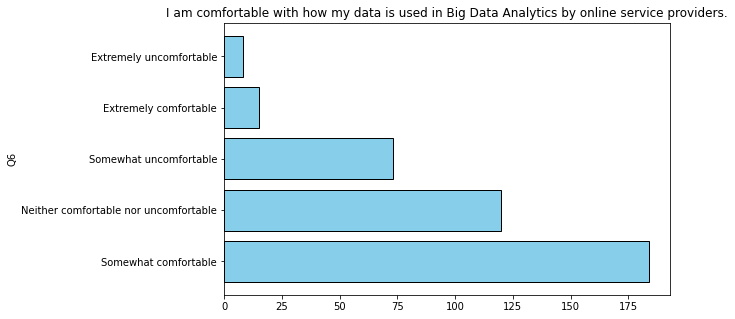

In [1455]:
plt.title(f"{data['Q6'][0]}")
data['Q6'][1:].value_counts().plot(kind='barh', color='skyblue', figsize=(8, 5), width=0.8, edgecolor='black')
plt.show()

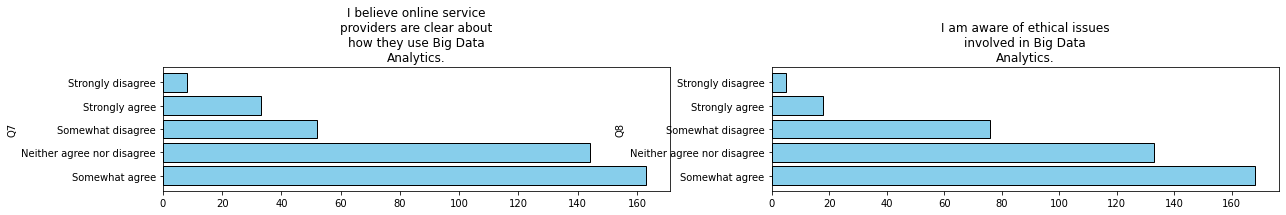

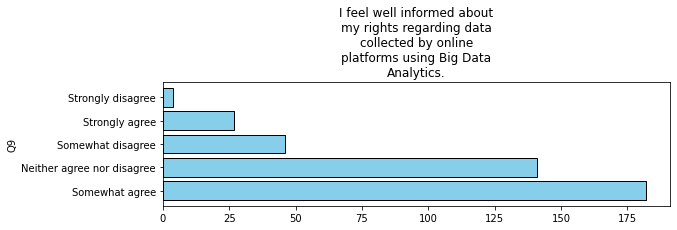

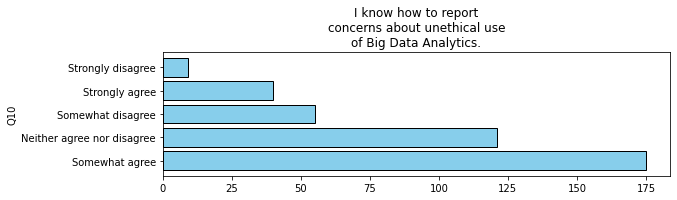

In [1456]:

plt.subplot(2, 2, 1)
plt.title(f"{textwrap.fill(data['Q7'][0], 28)}")
data['Q7'][1:].value_counts().plot(kind='barh', color='skyblue', figsize=(20, 5), width=0.8, edgecolor='black')

plt.subplot(2, 2, 2)
plt.title(f"{textwrap.fill(data['Q8'][0], 28)}")
data['Q8'][1:].value_counts().plot(kind='barh', color='skyblue', figsize=(20, 5), width=0.8, edgecolor='black')
plt.show()

plt.subplot(2, 2, 3)
plt.title(f"{textwrap.fill(data['Q9'][0], 28)}")
data['Q9'][1:].value_counts().plot(kind='barh', color='skyblue', figsize=(20, 5), width=0.8, edgecolor='black')
plt.show()

plt.subplot(2,2,4)
plt.title(f"{textwrap.fill(data['Q10'][0], 28)}")
data['Q10'][1:].value_counts().plot(kind='barh', color='skyblue', figsize=(20, 5), width=0.8, edgecolor='black')
plt.show()

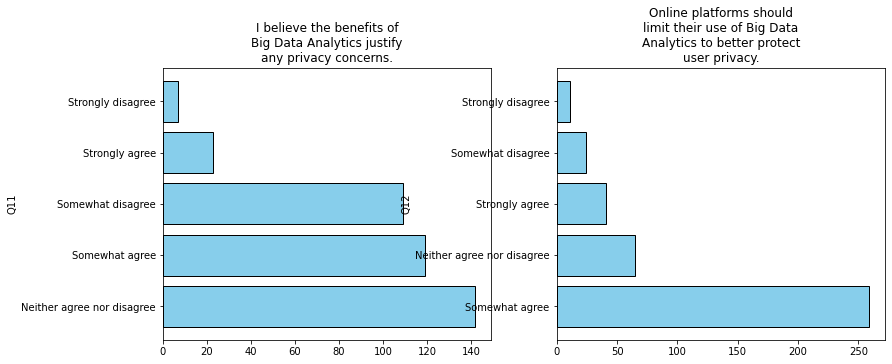

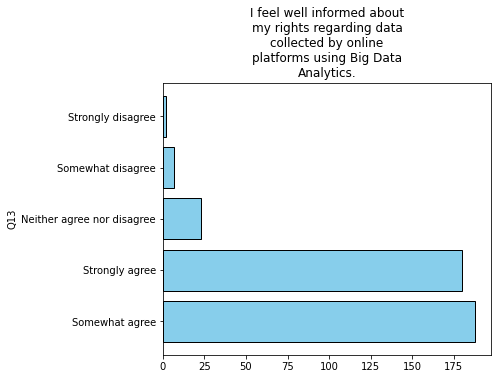

In [1457]:

plt.subplot(1, 3, 1)
plt.title(f"{textwrap.fill(data['Q11'][0], 28)}")
data['Q11'][1:].value_counts().plot(kind='barh', color='skyblue', figsize=(20, 5), width=0.8, edgecolor='black')

plt.subplot(1, 3, 2)
plt.title(f"{textwrap.fill(data['Q12'][0], 28)}")
data['Q12'][1:].value_counts().plot(kind='barh', color='skyblue', figsize=(20, 5), width=0.8, edgecolor='black')
plt.show()

plt.subplot(1, 3, 3)
plt.title(f"{textwrap.fill(data['Q9'][0], 28)}")
data['Q13'][1:].value_counts().plot(kind='barh', color='skyblue', figsize=(20, 5), width=0.8, edgecolor='black')
plt.show()



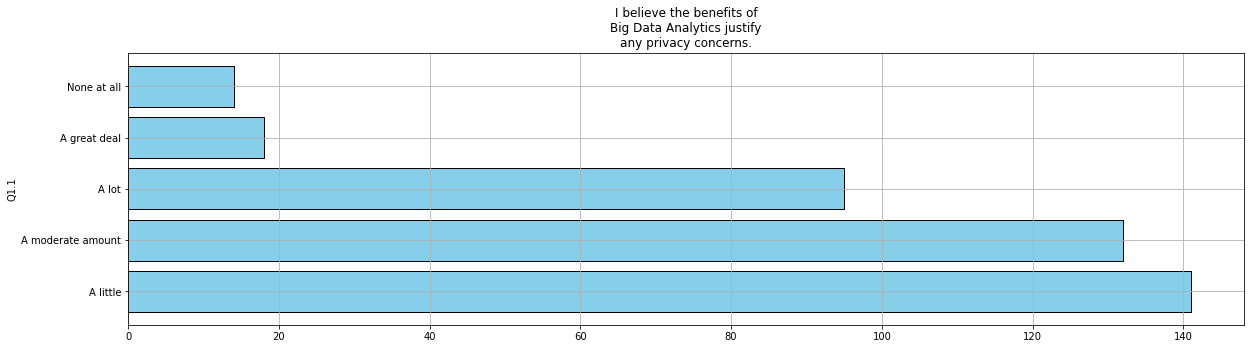

In [1458]:

plt.title(f"{textwrap.fill(data['Q11'][0], 28)}")
data['Q1.1'][1:].value_counts().plot(kind='barh', color='skyblue', figsize=(20, 5), width=0.8, edgecolor='black', grid='on')
plt.show()




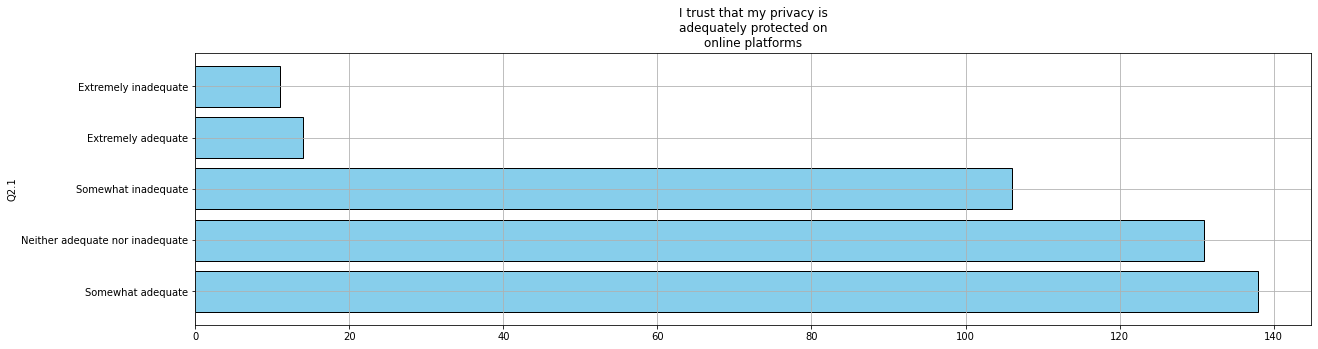

In [1459]:

plt.title(f"{textwrap.fill(data['Q2.1'][0], 28)}")
data['Q2.1'][1:].value_counts().plot(kind='barh', color='skyblue', figsize=(20, 5), width=0.8, edgecolor='black', grid='on')
plt.show()




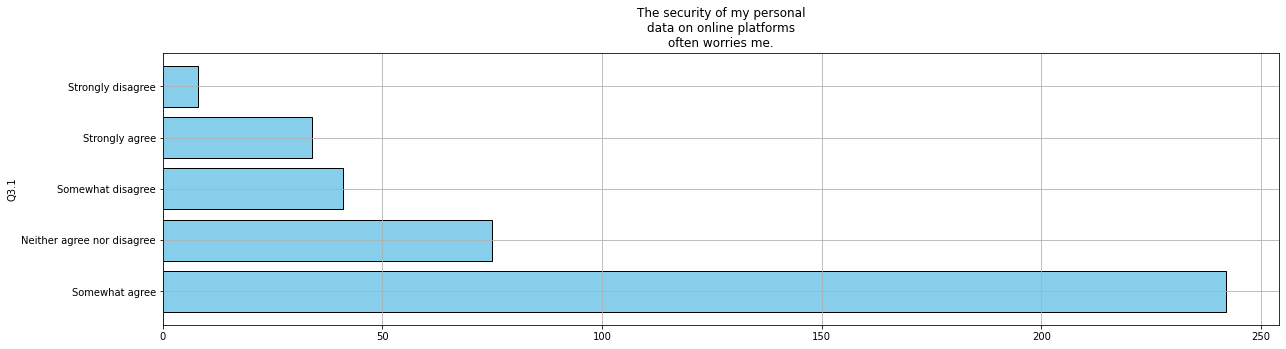

In [1460]:
plt.title(f"{textwrap.fill(data['Q3.1'][0], 28)}")
data['Q3.1'][1:].value_counts().plot(kind='barh', color='skyblue', figsize=(20, 5), width=0.8, edgecolor='black', grid='on')
plt.show()




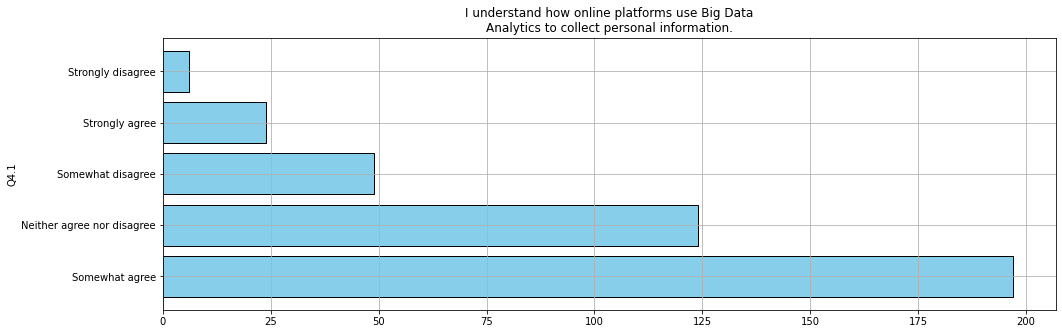

In [1461]:
plt.title(f"{textwrap.fill(data['Q4.1'][0], 50)}")
data['Q4.1'][1:].value_counts().plot(kind='barh', color='skyblue', figsize=(16, 5), width=0.8, edgecolor='black', grid='on')
plt.show()




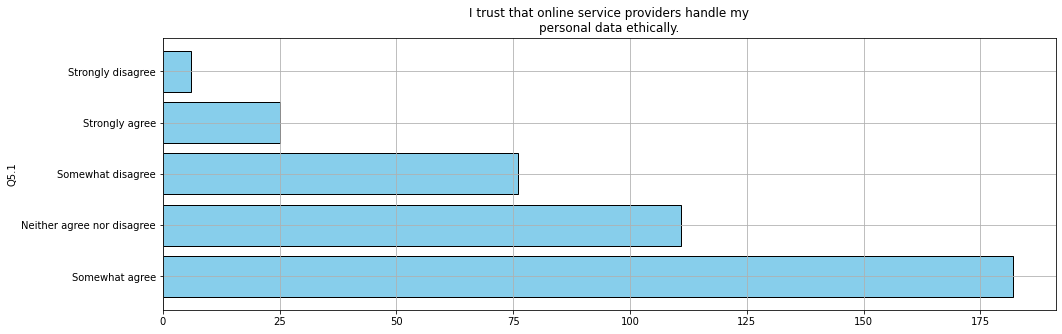

In [1462]:
plt.title(f"{textwrap.fill(data['Q5.1'][0], 50)}")
data['Q5.1'][1:].value_counts().plot(kind='barh', color='skyblue', figsize=(16, 5), width=0.8, edgecolor='black', grid='on')
plt.show()




**CORRELATION HEATMAP**

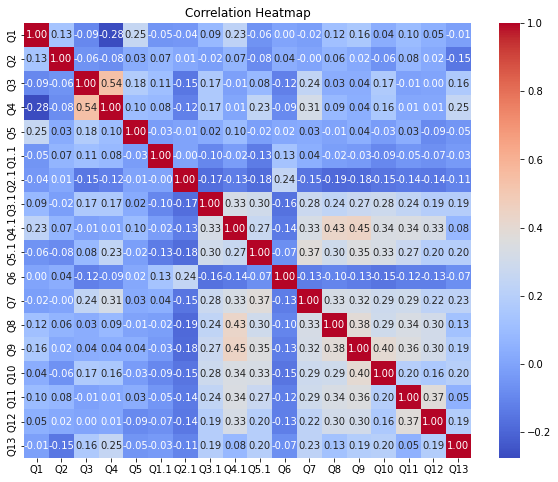

In [1463]:
df_encoded = data.iloc[1:, :].apply(lambda x: x.astype('category').cat.codes)
corr_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

---

Upon thorough examination of the dataset, it has been observed that certain features (*predictors*) demonstrate correlations with one another, potentially compromising the model's performance. To rectify this issue, the **Variance Inflation Factor (VIF)** methodology will be employed to mitigate multicollinearity and bolster the robustness of the model.

--- 


In [1464]:
target=['Q1.1', 'Q2.1', 'Q3.1', 'Q4.1', 'Q5.1']

In [1465]:
predictors=[i for i in data.columns if i not in target]

In [1466]:
df_=data[predictors]
df_.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13
0,1. What's your age?,What's your Gender,What's your educational level?,What's your occupation?,Frequency of Online Platform Usage,I am comfortable with how my data is used in B...,I believe online service providers are clear a...,I am aware of ethical issues involved in Big D...,I feel well informed about my rights regarding...,I know how to report concerns about unethical ...,I believe the benefits of Big Data Analytics j...,Online platforms should limit their use of Big...,Public discussions and education about Big Dat...
2,35-44,Female,Master's Degree,Employed Full-Time,Daily,Extremely comfortable,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
3,55-64,Non-binary / third gender,No formal education,Homemaker,Never,Somewhat comfortable,Somewhat agree,Somewhat disagree,Strongly agree,Neither agree nor disagree,Somewhat disagree,Strongly agree,Neither agree nor disagree
4,35-44,Male,Master's Degree,Student,Daily,Neither comfortable nor uncomfortable,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
5,25-34,Male,Master's Degree,Employed Full-Time,Daily,Somewhat uncomfortable,Strongly disagree,Strongly disagree,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,Strongly agree,Strongly agree


In [1467]:
feature_name=data.iloc[0, :]
feature_name

Q1                                    1. What's your age?
Q2                                     What's your Gender
Q3                         What's your educational level?
Q4                                What's your occupation?
Q5                     Frequency of Online Platform Usage
Q1.1    I am concerned about how much personal informa...
Q2.1    I trust that my privacy is adequately protecte...
Q3.1    The security of my personal data on online pla...
Q4.1    I understand how online platforms use Big Data...
Q5.1    I trust that online service providers handle m...
Q6      I am comfortable with how my data is used in B...
Q7      I believe online service providers are clear a...
Q8      I am aware of ethical issues involved in Big D...
Q9      I feel well informed about my rights regarding...
Q10     I know how to report concerns about unethical ...
Q11     I believe the benefits of Big Data Analytics j...
Q12     Online platforms should limit their use of Big...
Q13     Public

In [1468]:
new_df=df_.drop(index=0).reset_index(drop=True)

In [1469]:
new_df.head(3)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13
0,35-44,Female,Master's Degree,Employed Full-Time,Daily,Extremely comfortable,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
1,55-64,Non-binary / third gender,No formal education,Homemaker,Never,Somewhat comfortable,Somewhat agree,Somewhat disagree,Strongly agree,Neither agree nor disagree,Somewhat disagree,Strongly agree,Neither agree nor disagree
2,35-44,Male,Master's Degree,Student,Daily,Neither comfortable nor uncomfortable,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree


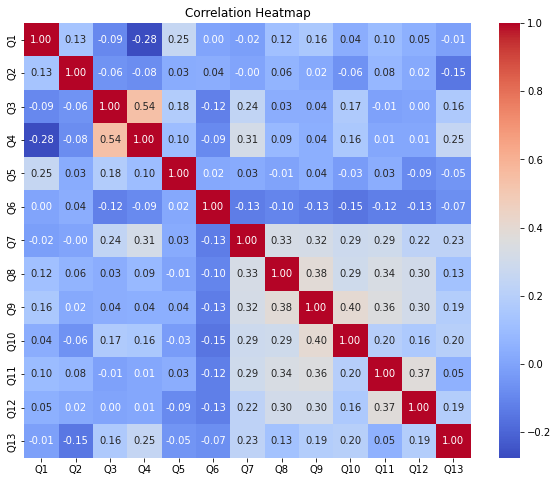

In [1470]:
newdf_encoded = new_df.apply(lambda x: x.astype('category').cat.codes)
corr_matrix = newdf_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [1471]:
df_

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13
0,1. What's your age?,What's your Gender,What's your educational level?,What's your occupation?,Frequency of Online Platform Usage,I am comfortable with how my data is used in B...,I believe online service providers are clear a...,I am aware of ethical issues involved in Big D...,I feel well informed about my rights regarding...,I know how to report concerns about unethical ...,I believe the benefits of Big Data Analytics j...,Online platforms should limit their use of Big...,Public discussions and education about Big Dat...
2,35-44,Female,Master's Degree,Employed Full-Time,Daily,Extremely comfortable,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
3,55-64,Non-binary / third gender,No formal education,Homemaker,Never,Somewhat comfortable,Somewhat agree,Somewhat disagree,Strongly agree,Neither agree nor disagree,Somewhat disagree,Strongly agree,Neither agree nor disagree
4,35-44,Male,Master's Degree,Student,Daily,Neither comfortable nor uncomfortable,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
5,25-34,Male,Master's Degree,Employed Full-Time,Daily,Somewhat uncomfortable,Strongly disagree,Strongly disagree,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,Strongly agree,Strongly agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,18-24,Female,Some College,Student,Daily,Somewhat comfortable,Somewhat agree,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat agree,Strongly agree
400,18-24,Female,Bachelor's Degree,Student,Daily,Extremely comfortable,Strongly agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Strongly agree
401,18-24,Male,Bachelor's Degree,Unemployed,Daily,Extremely uncomfortable,Somewhat disagree,Somewhat agree,Somewhat agree,Somewhat disagree,Somewhat disagree,Strongly agree,Strongly agree
402,18-24,Female,No formal education,Employed Full-Time,Daily,Somewhat comfortable,Somewhat agree,Somewhat disagree,Somewhat agree,Somewhat disagree,Somewhat agree,Somewhat agree,Somewhat agree


In [1472]:
__df=df_.copy()
__df.columns=__df.iloc[0, :]
__df.drop(index=0, inplace=True, errors='ignore')
__df.reset_index(drop=True)

,1. What's your age?,What's your Gender,What's your educational level?,What's your occupation?,Frequency of Online Platform Usage,I am comfortable with how my data is used in Big Data Analytics by online service providers.,I believe online service providers are clear about how they use Big Data Analytics.,I am aware of ethical issues involved in Big Data Analytics.,I feel well informed about my rights regarding data collected by online platforms using Big Data Analytics.,I know how to report concerns about unethical use of Big Data Analytics.,I believe the benefits of Big Data Analytics justify any privacy concerns.,Online platforms should limit their use of Big Data Analytics to better protect user privacy.,Public discussions and education about Big Data Analytics' privacy and ethics are important.
0,35-44,Female,Master's Degree,Employed Full-Time,Daily,Extremely comfortable,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
1,55-64,Non-binary / third gender,No formal education,Homemaker,Never,Somewhat comfortable,Somewhat agree,Somewhat disagree,Strongly agree,Neither agree nor disagree,Somewhat disagree,Strongly agree,Neither agree nor disagree
2,35-44,Male,Master's Degree,Student,Daily,Neither comfortable nor uncomfortable,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
3,25-34,Male,Master's Degree,Employed Full-Time,Daily,Somewhat uncomfortable,Strongly disagree,Strongly disagree,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,Strongly agree,Strongly agree
4,25-34,Female,Bachelor's Degree,Employed Full-Time,Daily,Somewhat comfortable,Somewhat disagree,Somewhat agree,Strongly agree,Somewhat agree,Somewhat agree,Somewhat agree,Strongly agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,18-24,Female,Some College,Student,Daily,Somewhat comfortable,Somewhat agree,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat agree,Strongly agree
396,18-24,Female,Bachelor's Degree,Student,Daily,Extremely comfortable,Strongly agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Strongly agree
397,18-24,Male,Bachelor's Degree,Unemployed,Daily,Extremely uncomfortable,Somewhat disagree,Somewhat agree,Somewhat agree,Somewhat disagree,Somewhat disagree,Strongly agree,Strongly agree
398,18-24,Female,No formal education,Employed Full-Time,Daily,Somewhat comfortable,Somewhat agree,Somewhat disagree,Somewhat agree,Somewhat disagree,Somewhat agree,Somewhat agree,Somewhat agree


In [1473]:
__df['Total_Agreement_Score'] = __df.iloc[:, 5:].apply(lambda x: (x == 'Strongly agree').sum(), axis=1)
__df['Total_Disagreement_Score'] = __df.iloc[:, 5:].apply(lambda x: (x == 'Strongly disagree').sum(), axis=1)
__df['Total_Disagreement_Score']

2      0
3      0
4      7
5      2
6      0
      ..
399    0
400    0
401    0
402    0
403    0
Name: Total_Disagreement_Score, Length: 400, dtype: int64

In [1474]:
awareness_columns = ['I am aware of ethical issues involved in Big Data Analytics.',
                     'I feel well informed about my rights regarding data collected by online platforms using Big Data Analytics.',
                     'I know how to report concerns about unethical use of Big Data Analytics.',
                     "Public discussions and education about Big Data Analytics' privacy and ethics are important."]
__df['Awareness_Score'] = __df[awareness_columns].apply(lambda x: (x == 'Strongly agree').sum(), axis=1)

In [1556]:
__df['Awareness_Score']

2      4
3      1
4      0
5      1
6      2
      ..
399    1
400    1
401    1
402    0
403    1
Name: Awareness_Score, Length: 400, dtype: int64

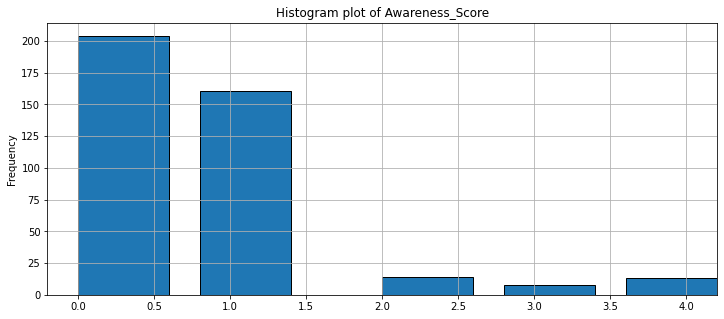

In [1570]:
__df['Awareness_Score'].plot(kind='hist', edgecolor='black', width=.6, figsize=(12, 5), grid='on')
plt.title('Histogram plot of Awareness_Score')
plt.show()

In [1476]:
__df['Education_Occupation_Interaction'] = __df['What\'s your educational level?'] + "_" + __df['What\'s your occupation?']
__df.head(4)

,1. What's your age?,What's your Gender,What's your educational level?,What's your occupation?,Frequency of Online Platform Usage,I am comfortable with how my data is used in Big Data Analytics by online service providers.,I believe online service providers are clear about how they use Big Data Analytics.,I am aware of ethical issues involved in Big Data Analytics.,I feel well informed about my rights regarding data collected by online platforms using Big Data Analytics.,I know how to report concerns about unethical use of Big Data Analytics.,I believe the benefits of Big Data Analytics justify any privacy concerns.,Online platforms should limit their use of Big Data Analytics to better protect user privacy.,Public discussions and education about Big Data Analytics' privacy and ethics are important.,Total_Agreement_Score,Total_Disagreement_Score,Awareness_Score,Education_Occupation_Interaction
2,35-44,Female,Master's Degree,Employed Full-Time,Daily,Extremely comfortable,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,7,0,4,Master's Degree_Employed Full-Time
3,55-64,Non-binary / third gender,No formal education,Homemaker,Never,Somewhat comfortable,Somewhat agree,Somewhat disagree,Strongly agree,Neither agree nor disagree,Somewhat disagree,Strongly agree,Neither agree nor disagree,2,0,1,No formal education_Homemaker
4,35-44,Male,Master's Degree,Student,Daily,Neither comfortable nor uncomfortable,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,0,7,0,Master's Degree_Student
5,25-34,Male,Master's Degree,Employed Full-Time,Daily,Somewhat uncomfortable,Strongly disagree,Strongly disagree,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,Strongly agree,Strongly agree,2,2,1,Master's Degree_Employed Full-Time


In [1477]:
__df['Gender_AgeGroup_Interaction'] = __df['What\'s your Gender'] + "_" + __df['1. What\'s your age?']
__df['Gender_AgeGroup_Interaction'].head(4)

2                       Female_35-44
3    Non-binary / third gender_55-64
4                         Male_35-44
5                         Male_25-34
Name: Gender_AgeGroup_Interaction, dtype: object

In [1480]:
__df

,1. What's your age?,What's your Gender,What's your educational level?,What's your occupation?,Frequency of Online Platform Usage,I am comfortable with how my data is used in Big Data Analytics by online service providers.,I believe online service providers are clear about how they use Big Data Analytics.,I am aware of ethical issues involved in Big Data Analytics.,I feel well informed about my rights regarding data collected by online platforms using Big Data Analytics.,I know how to report concerns about unethical use of Big Data Analytics.,I believe the benefits of Big Data Analytics justify any privacy concerns.,Online platforms should limit their use of Big Data Analytics to better protect user privacy.,Public discussions and education about Big Data Analytics' privacy and ethics are important.,Total_Agreement_Score,Total_Disagreement_Score,Awareness_Score,Education_Occupation_Interaction,Gender_AgeGroup_Interaction
2,35-44,Female,Master's Degree,Employed Full-Time,Daily,Extremely comfortable,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,7,0,4,Master's Degree_Employed Full-Time,Female_35-44
3,55-64,Non-binary / third gender,No formal education,Homemaker,Never,Somewhat comfortable,Somewhat agree,Somewhat disagree,Strongly agree,Neither agree nor disagree,Somewhat disagree,Strongly agree,Neither agree nor disagree,2,0,1,No formal education_Homemaker,Non-binary / third gender_55-64
4,35-44,Male,Master's Degree,Student,Daily,Neither comfortable nor uncomfortable,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,0,7,0,Master's Degree_Student,Male_35-44
5,25-34,Male,Master's Degree,Employed Full-Time,Daily,Somewhat uncomfortable,Strongly disagree,Strongly disagree,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,Strongly agree,Strongly agree,2,2,1,Master's Degree_Employed Full-Time,Male_25-34
6,25-34,Female,Bachelor's Degree,Employed Full-Time,Daily,Somewhat comfortable,Somewhat disagree,Somewhat agree,Strongly agree,Somewhat agree,Somewhat agree,Somewhat agree,Strongly agree,2,0,2,Bachelor's Degree_Employed Full-Time,Female_25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,18-24,Female,Some College,Student,Daily,Somewhat comfortable,Somewhat agree,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat agree,Strongly agree,1,0,1,Some College_Student,Female_18-24
400,18-24,Female,Bachelor's Degree,Student,Daily,Extremely comfortable,Strongly agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Strongly agree,2,0,1,Bachelor's Degree_Student,Female_18-24
401,18-24,Male,Bachelor's Degree,Unemployed,Daily,Extremely uncomfortable,Somewhat disagree,Somewhat agree,Somewhat agree,Somewhat disagree,Somewhat disagree,Strongly agree,Strongly agree,2,0,1,Bachelor's Degree_Unemployed,Male_18-24
402,18-24,Female,No formal education,Employed Full-Time,Daily,Somewhat comfortable,Somewhat agree,Somewhat disagree,Somewhat agree,Somewhat disagree,Somewhat agree,Somewhat agree,Somewhat agree,0,0,0,No formal education_Employed Full-Time,Female_18-24


In [1481]:
__df.iloc[:, 0].dtype=='O'

True

In [1482]:
# Encode_data
Encoded_x=__df.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype=='O' else x)

In [1483]:
Encoded_x.head(3)

,1. What's your age?,What's your Gender,What's your educational level?,What's your occupation?,Frequency of Online Platform Usage,I am comfortable with how my data is used in Big Data Analytics by online service providers.,I believe online service providers are clear about how they use Big Data Analytics.,I am aware of ethical issues involved in Big Data Analytics.,I feel well informed about my rights regarding data collected by online platforms using Big Data Analytics.,I know how to report concerns about unethical use of Big Data Analytics.,I believe the benefits of Big Data Analytics justify any privacy concerns.,Online platforms should limit their use of Big Data Analytics to better protect user privacy.,Public discussions and education about Big Data Analytics' privacy and ethics are important.,Total_Agreement_Score,Total_Disagreement_Score,Awareness_Score,Education_Occupation_Interaction,Gender_AgeGroup_Interaction
2,2,0,3,0,0,0,3,3,3,3,3,3,3,7,0,4,13,2
3,4,2,4,2,2,3,1,2,3,0,2,3,0,2,0,1,19,10
4,2,1,3,4,0,2,4,4,4,4,4,4,4,0,7,0,16,7


In [1484]:
Encoded_x.corr()

,1. What's your age?,What's your Gender,What's your educational level?,What's your occupation?,Frequency of Online Platform Usage,I am comfortable with how my data is used in Big Data Analytics by online service providers.,I believe online service providers are clear about how they use Big Data Analytics.,I am aware of ethical issues involved in Big Data Analytics.,I feel well informed about my rights regarding data collected by online platforms using Big Data Analytics.,I know how to report concerns about unethical use of Big Data Analytics.,I believe the benefits of Big Data Analytics justify any privacy concerns.,Online platforms should limit their use of Big Data Analytics to better protect user privacy.,Public discussions and education about Big Data Analytics' privacy and ethics are important.,Total_Agreement_Score,Total_Disagreement_Score,Awareness_Score,Education_Occupation_Interaction,Gender_AgeGroup_Interaction
0,,,,,,,,,,,,,,,,,,
1. What's your age?,1.000000,0.134063,-0.092861,-0.275193,0.253236,0.000346,-0.019566,0.117781,0.157236,0.037089,0.096511,0.048104,-0.012799,0.027423,0.130367,0.045362,-0.114060,0.350484
What's your Gender,0.134063,1.000000,-0.059512,-0.078446,0.032201,0.035018,-0.000422,0.059143,0.023382,-0.062394,0.076440,0.022393,-0.148554,-0.087306,-0.000380,-0.106621,-0.061451,0.972290
What's your educational level?,-0.092861,-0.059512,1.000000,0.538202,0.179308,-0.115818,0.242337,0.034860,0.037253,0.172102,-0.006778,0.001062,0.164242,0.181378,0.132364,0.163571,0.989645,-0.086664
What's your occupation?,-0.275193,-0.078446,0.538202,1.000000,0.099952,-0.090661,0.314767,0.086477,0.043482,0.155228,0.013217,0.013463,0.249676,0.239307,0.125170,0.206801,0.646681,-0.144476
Frequency of Online Platform Usage,0.253236,0.032201,0.179308,0.099952,1.000000,0.017653,0.027650,-0.005599,0.042131,-0.027656,0.034058,-0.090840,-0.051745,-0.055086,0.071186,-0.055220,0.188956,0.085519
I am comfortable with how my data is used in Big Data Analytics by online service providers.,0.000346,0.035018,-0.115818,-0.090661,0.017653,1.000000,-0.127936,-0.102386,-0.129840,-0.154051,-0.122730,-0.125600,-0.072918,-0.331907,-0.152086,-0.271232,-0.115608,0.032284
I believe online service providers are clear about how they use Big Data Analytics.,-0.019566,-0.000422,0.242337,0.314767,0.027650,-0.127936,1.000000,0.326737,0.322175,0.285977,0.294287,0.223917,0.225125,0.418220,0.353347,0.321626,0.265823,-0.005130
I am aware of ethical issues involved in Big Data Analytics.,0.117781,0.059143,0.034860,0.086477,-0.005599,-0.102386,0.326737,1.000000,0.383521,0.293397,0.335237,0.304500,0.126956,0.363612,0.351285,0.333600,0.044737,0.080376
I feel well informed about my rights regarding data collected by online platforms using Big Data Analytics.,0.157236,0.023382,0.037253,0.043482,0.042131,-0.129840,0.322175,0.383521,1.000000,0.398875,0.355558,0.303879,0.185718,0.458000,0.333978,0.461985,0.040944,0.051450


In [1485]:
__df.drop(["What's your Gender", "What's your educational level?",
           "I feel well informed about my rights regarding data collected by online platforms using Big Data Analytics"], 
         axis=1, errors='ignore', inplace=True)

In [1486]:
Encoded_x

,1. What's your age?,What's your Gender,What's your educational level?,What's your occupation?,Frequency of Online Platform Usage,I am comfortable with how my data is used in Big Data Analytics by online service providers.,I believe online service providers are clear about how they use Big Data Analytics.,I am aware of ethical issues involved in Big Data Analytics.,I feel well informed about my rights regarding data collected by online platforms using Big Data Analytics.,I know how to report concerns about unethical use of Big Data Analytics.,I believe the benefits of Big Data Analytics justify any privacy concerns.,Online platforms should limit their use of Big Data Analytics to better protect user privacy.,Public discussions and education about Big Data Analytics' privacy and ethics are important.,Total_Agreement_Score,Total_Disagreement_Score,Awareness_Score,Education_Occupation_Interaction,Gender_AgeGroup_Interaction
2,2,0,3,0,0,0,3,3,3,3,3,3,3,7,0,4,13,2
3,4,2,4,2,2,3,1,2,3,0,2,3,0,2,0,1,19,10
4,2,1,3,4,0,2,4,4,4,4,4,4,4,0,7,0,16,7
5,1,1,3,0,0,4,4,4,0,2,0,3,3,2,2,1,13,6
6,1,0,0,0,0,3,2,1,3,1,1,1,3,2,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0,0,5,4,0,3,1,0,2,2,1,1,3,1,0,1,25,0
400,0,0,0,4,0,0,3,1,1,1,1,0,3,2,0,1,4,0
401,0,1,0,5,0,1,2,1,1,2,2,3,3,2,0,1,5,5
402,0,0,4,0,0,3,1,2,1,2,1,1,1,0,0,0,17,0


In [1487]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.DataFrame(Encoded_x)

# Add constant column for intercept
numeric_data = df.select_dtypes(include=['int', 'float'])

# Add a constant term to the independent variables
X = sm.add_constant(numeric_data)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                             Variable         VIF
0                                               const   24.388511
1                                 1. What's your age?   11.325273
2                                  What's your Gender  183.822881
3                      What's your educational level?  418.304644
4                             What's your occupation?   16.145860
5                  Frequency of Online Platform Usage    1.195529
6   I am comfortable with how my data is used in B...    1.275140
7   I believe online service providers are clear a...    1.734696
8   I am aware of ethical issues involved in Big D...    1.433772
9   I feel well informed about my rights regarding...    1.679200
10  I know how to report concerns about unethical ...    1.719450
11  I believe the benefits of Big Data Analytics j...    1.431080
12  Online platforms should limit their use of Big...    2.151817
13  Public discussions and education about Big Dat...    2.737327
14        

---

**VIF Analysis:**

- **Gender:** Extremely high VIF (183.82), indicating severe multicollinearity.
- **Education level:** Very high VIF (418.30), indicating severe multicollinearity.
- **Occupation:** Moderate VIF (16.15), notable multicollinearity.
- **Other variables:** Generally low VIFs (<3), indicating minimal multicollinearity.
- **Interactions:** Severe multicollinearity observed in interaction terms (VIFs >200).

Severe multicollinearity detected in gender, education level, and certain interactions.

---


In [1507]:
#Drop multicollinear features 
Encoded_x.drop(["What's your educational level?", "What's your Gender", Encoded_x.columns[6], "Total_Agreement_Score"], axis=1, inplace=True, errors='ignore')


In [1508]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.DataFrame(Encoded_x)

# Add constant column for intercept
numeric_data = df.select_dtypes(include=['int', 'float'])

# Add a constant term to the independent variables
X = sm.add_constant(numeric_data)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                             Variable        VIF
0                                               const  21.544871
1                                 1. What's your age?   1.387556
2                             What's your occupation?   1.994143
3                  Frequency of Online Platform Usage   1.161887
4   I am comfortable with how my data is used in B...   1.155468
5   I believe online service providers are clear a...   1.421270
6   I am aware of ethical issues involved in Big D...   1.420767
7   I believe the benefits of Big Data Analytics j...   1.381516
8   Online platforms should limit their use of Big...   1.395487
9   Public discussions and education about Big Dat...   2.249048
10                           Total_Disagreement_Score   1.599313
11                                    Awareness_Score   2.887638
12                   Education_Occupation_Interaction   1.816584
13                        Gender_AgeGroup_Interaction   1.180705


## FEATURE ENGINEERING

In [1509]:
privacy_concerns=data[target][1:].astype('category')
encoded_privacy_concerns=privacy_concerns.apply(lambda x: x.cat.codes) # encode the categorical variables

In [1510]:
encoded_privacy_concerns

,Q1.1,Q2.1,Q3.1,Q4.1,Q5.1
2,0,2,3,3,3
3,4,1,0,3,0
4,4,1,4,4,4
5,2,1,2,4,2
6,3,3,2,1,1
...,...,...,...,...,...
399,4,3,1,0,3
400,1,2,2,1,3
401,0,1,3,1,4
402,4,3,2,2,1


In [1583]:
encoded_privacy_concerns_sum = encoded_privacy_concerns.sum(axis=1)

# Define a threshold for identifying individuals with heightened privacy concerns
threshold = encoded_privacy_concerns_sum.mean()  # You can adjust the threshold as needed

# Create a binary target variable based on the threshold
Y_label = (encoded_privacy_concerns_sum > threshold).astype(int)
print('Target Variable:')
print(Y_label)

Target Variable:
2      1
3      1
4      1
5      1
6      1
      ..
399    1
400    1
401    1
402    1
403    1
Length: 400, dtype: int32


### Code Breakdown:

1. **Aggregate Responses**: Extract columns related to privacy concerns from a DataFrame.

2. **Sum the Responses**: Calculate a total privacy concern score for each individual.

3. **Define Threshold**: Establish a threshold for identifying individuals with heightened privacy concerns, typically set as the mean of aggregated responses.

4. **Create Binary Target Variable**: Generate a new column indicating whether an individual's privacy concerns exceed the threshold.

5. **Print Resulting DataFrame**: Display the modified DataFrame with demographic information and the newly created binary target variable indicating heightened privacy concerns.

This process allows for analyzing the relationship between demographic factors and the likelihood of heightened privacy concerns.


In [1512]:
# Encode the Predictors
new_df_encoded=Encoded_x.copy()
new_df_encoded

,1. What's your age?,What's your occupation?,Frequency of Online Platform Usage,I am comfortable with how my data is used in Big Data Analytics by online service providers.,I believe online service providers are clear about how they use Big Data Analytics.,I am aware of ethical issues involved in Big Data Analytics.,I believe the benefits of Big Data Analytics justify any privacy concerns.,Online platforms should limit their use of Big Data Analytics to better protect user privacy.,Public discussions and education about Big Data Analytics' privacy and ethics are important.,Total_Disagreement_Score,Awareness_Score,Education_Occupation_Interaction,Gender_AgeGroup_Interaction
2,2,0,0,0,3,3,3,3,3,0,4,13,2
3,4,2,2,3,1,2,2,3,0,0,1,19,10
4,2,4,0,2,4,4,4,4,4,7,0,16,7
5,1,0,0,4,4,4,0,3,3,2,1,13,6
6,1,0,0,3,2,1,1,1,3,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0,4,0,3,1,0,1,1,3,0,1,25,0
400,0,4,0,0,3,1,1,0,3,0,1,4,0
401,0,5,0,1,2,1,2,3,3,0,1,5,5
402,0,0,0,3,1,2,1,1,1,0,0,17,0


In [1513]:
selector = SelectKBest(score_func=mutual_info_classif, k=5)  # Choose the number of features you want to select
X_selected = selector.fit_transform(new_df_encoded, Y_label)

In [1514]:
print('Feature p-value:', selector.scores_)

Feature p-value: [0.         0.00862156 0.         0.         0.0296445  0.
 0.0346208  0.01370862 0.         0.         0.         0.01116447
 0.        ]


Text(0.5, 0, 'Class')

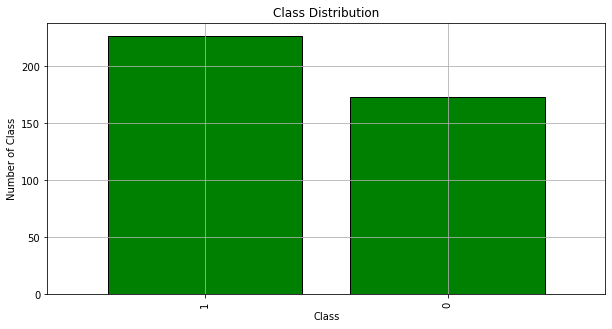

In [1515]:
# Visualize class distribution

Y_label.value_counts().plot(kind='bar', edgecolor='black', width=.8,
                            title='Class Distribution', color='green',
                            figsize=(10, 5), grid='on')
plt.ylabel('Number of Class')
plt.xlabel('Class')

In [1530]:
X, y=SMOTE(random_state=147).fit_resample(new_df_encoded, Y_label)

Text(0.5, 0, 'Class')

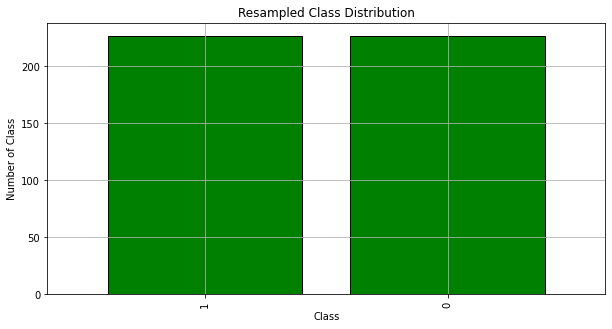

In [1555]:
# Visualize class distribution

y.value_counts().plot(kind='bar', edgecolor='black', width=.8,
                            title='Resampled Class Distribution', color='green',
                            figsize=(10, 5), grid='on')
plt.ylabel('Number of Class')
plt.xlabel('Class')

In [1531]:
print('-- Number of Training samples', X.shape[0],'and', y.shape[0], 'respectively')

-- Number of Training samples 454 and 454 respectively


In [1532]:
train, test, train_label, test_label=train_test_split(X, y, test_size=.09)

In [1533]:
print('-- Number of Training samples and test samples', train.shape[0],'and', test.shape[0], 'respectively')

-- Number of Training samples and test samples 413 and 41 respectively


# Model creation

# EXTRA TREES CLASSIFIER

In [1539]:
model=ExtraTreesClassifier()
model.fit(train, train_label)


In [1541]:
prediction=model.predict(test)
accuracy=accuracy_score(test_label, prediction)
print('accuracy score:', accuracy)

accuracy score: 0.7317073170731707


In [1542]:
prediction=model.predict(test)
accuracy=accuracy_score(test_label, prediction)
print('accuracy score:', accuracy)

accuracy score: 0.7317073170731707


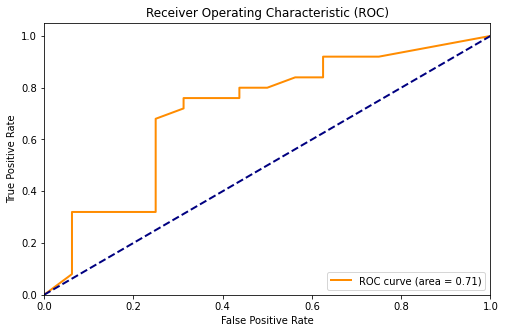

In [1544]:
y_score = model.predict_proba(test)
fpr, tpr, _ = roc_curve(test_label, y_score[:, 1])
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [1545]:
print(f'Classification report using Extra Trees:\n{classification_report(test_label, prediction)}')

Classification report using Extra Trees:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        16
           1       0.79      0.76      0.78        25

    accuracy                           0.73        41
   macro avg       0.72      0.72      0.72        41
weighted avg       0.74      0.73      0.73        41



Text(0.5, 1.0, 'Confusion Matrix')

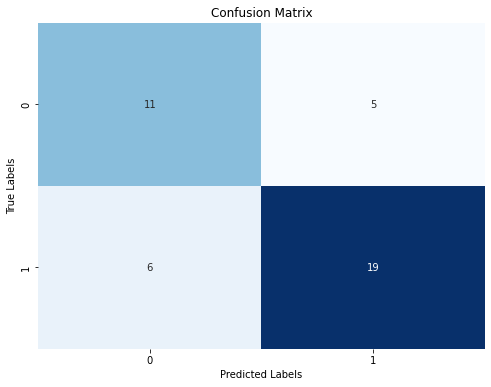

In [1546]:
conf_matrix = confusion_matrix(test_label, prediction)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [1547]:
joblib.dump(model, 'extra_trees_model.pkl')

['extra_trees_model.pkl']

# SVC MODEL

In [1552]:
svc=SVC(probability=True)
svc.fit(train, train_label)

SVC(probability=True)

In [1404]:
prediction=svc.predict(test)
accuracy=accuracy_score(test_label, prediction)
print('Accuracy_ Score', accuracy)

Accuracy_ Score 0.7073170731707317


In [1405]:
print(f'SVC Model:\n{classification_report(test_label, prediction)}')

SVC Model:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        25
           1       0.60      0.75      0.67        16

    accuracy                           0.71        41
   macro avg       0.70      0.72      0.70        41
weighted avg       0.73      0.71      0.71        41



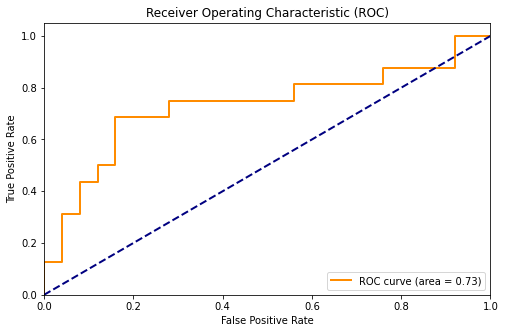

In [1406]:
y_score = svc.predict_proba(test)
fpr, tpr, _ = roc_curve(test_label, y_score[:, 1])
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

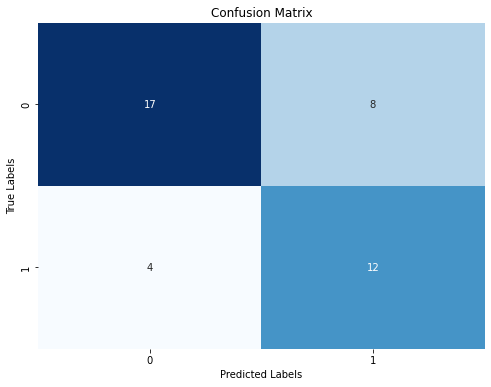

In [1407]:
conf_matrix = confusion_matrix(test_label, prediction)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [1408]:
joblib.dump(model, 'svc_model.pkl')

['svc_model.pkl']